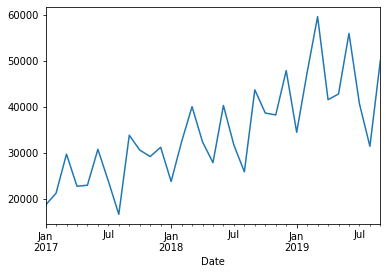

In [43]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot
import numpy as np

df = pd.read_excel("Calls.xlsx")

df.index=pd.to_datetime(df['Date'])
df['Calls'].plot()
pyplot.show()

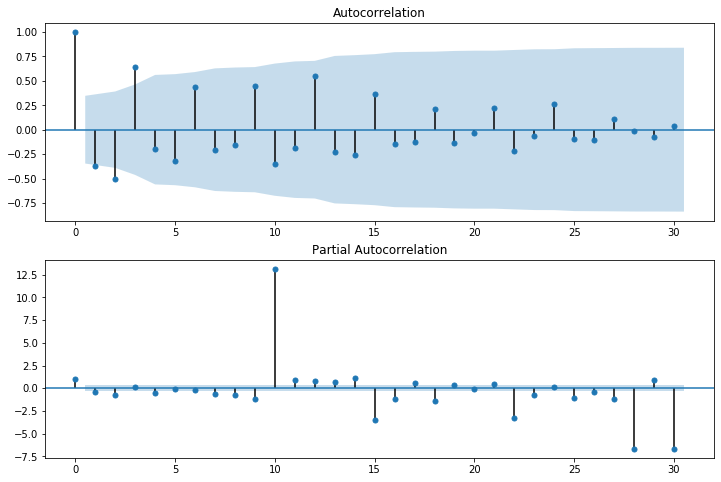

In [27]:
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Calls'].diff().dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Calls'].diff().dropna(), lags=30, ax=ax2)
pyplot.show()

In [19]:
model=sm.tsa.statespace.SARIMAX(endog=df['Calls'],order=(0,1,0),seasonal_order=(0,0,1,6),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Calls   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 0, 1, 6)   Log Likelihood                -338.744
Date:                           Fri, 06 Dec 2019   AIC                            683.487
Time:                                   11:47:51   BIC                            687.884
Sample:                               01-01-2017   HQIC                           684.945
                                    - 09-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    984.7188   2292.262      0.430      0.667   -3508.033    5477.471
ma.S.L6        0.2340      0.222      1.055

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [20]:
print(df['Calls'].diff().diff(12))

Date
2017-01-01        NaN
2017-02-01        NaN
2017-03-01        NaN
2017-04-01        NaN
2017-05-01        NaN
2017-06-01        NaN
2017-07-01        NaN
2017-08-01        NaN
2017-09-01        NaN
2017-10-01        NaN
2017-11-01        NaN
2017-12-01        NaN
2018-01-01        NaN
2018-02-01     6090.0
2018-03-01     -877.0
2018-04-01     -662.0
2018-05-01    -4747.0
2018-06-01     4613.0
2018-07-01    -1697.0
2018-08-01     1423.0
2018-09-01      630.0
2018-10-01    -1830.0
2018-11-01      999.0
2018-12-01     7632.0
2019-01-01    -5980.0
2019-02-01     4377.0
2019-03-01     4505.0
2019-04-01   -10413.0
2019-05-01     5765.0
2019-06-01      757.0
2019-07-01    -6711.0
2019-08-01    -3445.0
2019-09-01      895.0
Name: Calls, dtype: float64


In [21]:
print(df['Calls'].diff(12))

Date
2017-01-01        NaN
2017-02-01        NaN
2017-03-01        NaN
2017-04-01        NaN
2017-05-01        NaN
2017-06-01        NaN
2017-07-01        NaN
2017-08-01        NaN
2017-09-01        NaN
2017-10-01        NaN
2017-11-01        NaN
2017-12-01        NaN
2018-01-01     5115.0
2018-02-01    11205.0
2018-03-01    10328.0
2018-04-01     9666.0
2018-05-01     4919.0
2018-06-01     9532.0
2018-07-01     7835.0
2018-08-01     9258.0
2018-09-01     9888.0
2018-10-01     8058.0
2018-11-01     9057.0
2018-12-01    16689.0
2019-01-01    10709.0
2019-02-01    15086.0
2019-03-01    19591.0
2019-04-01     9178.0
2019-05-01    14943.0
2019-06-01    15700.0
2019-07-01     8989.0
2019-08-01     5544.0
2019-09-01     6439.0
Name: Calls, dtype: float64


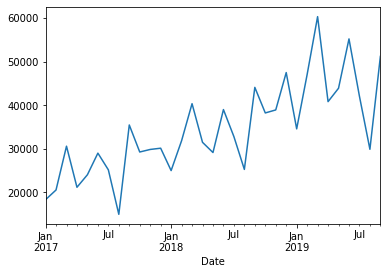

In [22]:
np.random.seed(5968)
noise=[np.random.normal(scale=500)]

for i in range(len(df)-1):
    noise.append(np.random.normal(scale=500)+noise[i]*(-0.85))
df['Calls2']=df['Calls']+noise
df['Calls2'].plot()
plt.show()

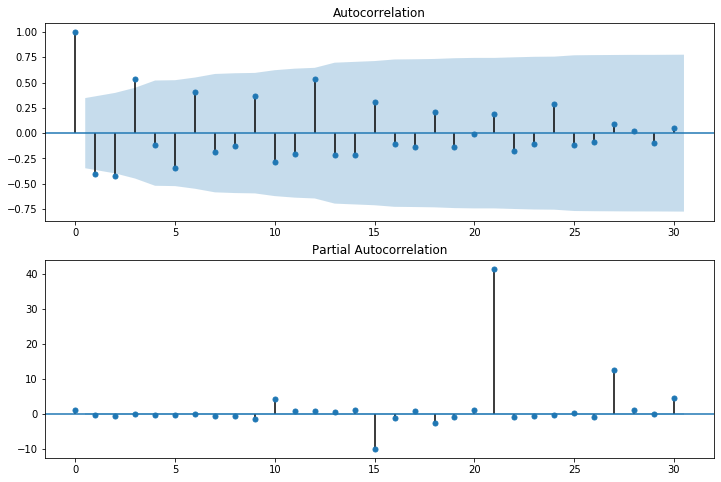

(-6.027855198853184, 1.4414991389746503e-07, 10, 21, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, 401.86322397493547)


In [32]:
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Calls2'].diff().dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Calls2'].diff().dropna(), lags=30, ax=ax2)
pyplot.show()

print(sm.tsa.stattools.adfuller(df['Calls2'].diff().dropna()))

In [33]:
model=sm.tsa.statespace.SARIMAX(endog=df['Calls2'],order=(1,1,0),seasonal_order=(0,1,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             Calls2   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -195.956
Date:                            Fri, 06 Dec 2019   AIC                            397.913
Time:                                    12:20:10   BIC                            400.900
Sample:                                01-01-2017   HQIC                           398.496
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -272.1061    996.218     -0.273      0.785   -2224.657    1680.445
ar.L1         -0.3533      0.176   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
model2=sm.tsa.statespace.SARIMAX(endog=df['Calls2'],order=(1,1,0),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results2=model2.fit()
print(results2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: maxlag should be < nobs

In [42]:
df['noise']=[noise[i]+0.85*noise[i-1] if i>0 else 0 for i in range(len(noise))]
results.resid2.loc['2017-01-01':].plot(label='Regression Residuals')
df['noise'].loc['2017-01-01':].plot(color='r',label='True Noise')
plt.legend(loc=2)
plt.show()

AttributeError: 'SARIMAXResults' object has no attribute 'resid2'